# Libraries

In [1]:
import os 
import pathlib
from glob import glob 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" #Remove tensorflow warnings

# Install the Object Detection API : inspired from [parthbkgadoya's notebook](https://www.kaggle.com/parthbkgadoya/tensorflow-object-detection-api-installation)

## Download the models

In [2]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3075, done.
remote: Counting objects: 100% (3075/3075), done.
remote: Compressing objects: 100% (2604/2604), done.
remote: Total 3075 (delta 774), reused 1358 (delta 428), pack-reused 0
Receiving objects: 100% (3075/3075), 33.32 MiB | 13.92 MiB/s, done.
Resolving deltas: 100% (774/774), done.


## Compile proto files

In [3]:
%cd models/research
!pip install protobuf
!protoc object_detection/protos/*.proto --python_out=.
%cd ..
%cd ..

/kaggle/working/models/research
/kaggle/working/models
/kaggle/working


## Install the CocoAPI

In [4]:
!pip install cython 
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ..
%cd ..
!cp -r cocoapi/PythonAPI/pycocotools models/research/

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 6.05 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/kaggle/working/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/opt/conda/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /kaggle/working/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.7/si

## Install the object detection api

In [5]:
%cd models/research
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .
%cd ..
%cd ..

/kaggle/working/models/research
Processing /kaggle/working/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 352 kB 285 kB/s 
     |████████████████████████████████| 1.8 MB 4.4 MB/s 
     |████████████████████████████████| 90 kB 6.9 MB/s 
     |████████████████████████████████| 213 kB 32.7 MB/s 
     |████████████████████████████████| 99 kB 7.9 MB/s 
     |████████████████████████████████| 4.4 MB 33.5 MB/s 
     |████████████████████████████████| 61 kB 6.0 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 21.8 MB 854 kB/s 
     |███████████

## Verify the TensorFlow 2 Object Detection API installation (optional)

In [6]:
%cd models/research
!python object_detection/builders/model_builder_tf2_test.py
%cd ..
%cd ..

/kaggle/working/models/research
Running tests under Python 3.7.10: /opt/conda/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
/opt/conda/lib/python3.7/site-packages/object_detection/builders/model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W1111 09:53:14.416869 140514365699904 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
I1111 09:53:14.695448 140514365699904 test_util.py:2189] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.76s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
I1111 09:53:15.309699 140514365699904 test_util.py:2189] time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.61s
[       OK ] ModelBuilderTF2Test.test_create_ce

# Train the model 

The dataset includes a set of useful tools, like a ready-to-use workspace which contains : 
- The resnet50 pre-trained model
- The custom training pipeline suitable to our model 
- The training script from Tensorflow Object Detection API

In [7]:
%cd /

/


## Copy the input workspace files to the working directory 

Note : **For some reason, there seems to be an issue with the Kaggle permissions when running the training job with the files stored on the input folder**

In [8]:
!cp -r kaggle/input/one-piece-character-detection-with-tfrecords/workspace kaggle/working

In [9]:
!cp -r kaggle/input/one-piece-character-detection-with-tfrecords/workspace/models/myresnet_50 kaggle/working

In [10]:
%cd kaggle/working

/kaggle/working


## Train : batch size = 8

In [11]:
!python "./workspace/model_main_tf2.py" \
--model_dir="./myresnet_50" \
--pipeline_config_path="./workspace/models/myresnet_50/pipeline_batch_size_8.config"

I1111 09:53:54.085740 140139295975232 mirrored_strategy.py:369] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1111 09:53:54.090969 140139295975232 config_util.py:552] Maybe overwriting train_steps: None
I1111 09:53:54.091130 140139295975232 config_util.py:552] Maybe overwriting use_bfloat16: False
W1111 09:53:54.118903 140139295975232 deprecation.py:345] From /opt/conda/lib/python3.7/site-packages/object_detection/model_lib_v2.py:558: StrategyBase.experimental_distribute_datasets_from_function (from tensorflow.python.distribute.distribute_lib) is deprecated and will be removed in a future version.
Instructions for updating:
rename to distribute_datasets_from_function
I1111 09:53:54.139292 140139295975232 dataset_builder.py:163] Reading unweighted datasets: ['/kaggle/input/one-piece-character-detection-with-tfrecords/Data/Data/training.tfrecord']
I1111 09:53:54.143135 140139295975232 dataset_builder.py:80] Reading record datasets for input file: 

## Export the model

In [12]:
!python "./models/research/object_detection/exporter_main_v2.py" \
--input_type image_tensor \
--pipeline_config_path "./workspace/models/myresnet_50/pipeline_batch_size_8.config" \
--trained_checkpoint_dir "./myresnet_50" \
--output_directory "./export-model"

W1111 13:47:29.755135 140631691290432 deprecation.py:616] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/autograph/impl/api.py:463: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1111 13:47:48.743617 140631691290432 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7fe6f0395e90>, because it is not built.
W1111 13:48:21.286241 140631691290432 save.py:254] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_co

# Test the model (optional)

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the exported model 

In [14]:
model = tf.saved_model.load("./export-model/saved_model")

## Get the test files

In [15]:
test_dir = "../input/one-piece-character-detection-with-tfrecords/Test images/Test images"
test_filenames = glob(test_dir+"/*")
print(f"Test file names: {np.array(test_filenames)}")

Test file names: ['../input/one-piece-character-detection-with-tfrecords/Test images/Test images/623.png'
 '../input/one-piece-character-detection-with-tfrecords/Test images/Test images/688.png'
 '../input/one-piece-character-detection-with-tfrecords/Test images/Test images/520.png'
 '../input/one-piece-character-detection-with-tfrecords/Test images/Test images/66.png'
 '../input/one-piece-character-detection-with-tfrecords/Test images/Test images/548.png'
 '../input/one-piece-character-detection-with-tfrecords/Test images/Test images/452.png']


## Load the label map

In [16]:
category_index = label_map_util.create_category_index_from_labelmap("../input/one-piece-character-detection-with-tfrecords/TFrecords/TFrecords/tf_label_map.pbtxt",use_display_name=True)

## Predict an save the predictions

--------------------------------------------
File: 623.png 

Done


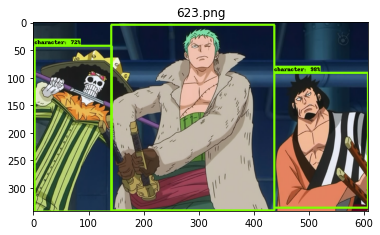

--------------------------------------------
File: 688.png 

Done


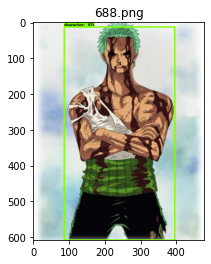

--------------------------------------------
File: 520.png 

Done


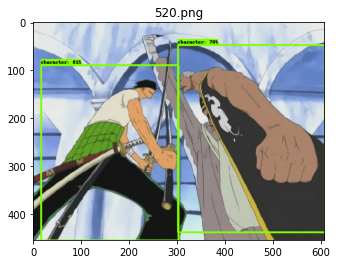

--------------------------------------------
File: 66.png 

Done


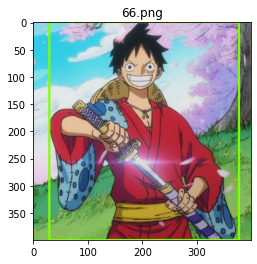

--------------------------------------------
File: 548.png 

Done


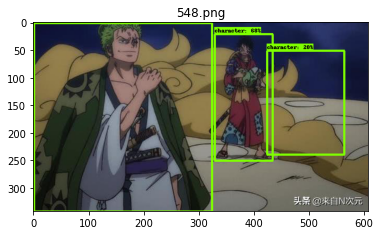

--------------------------------------------
File: 452.png 

Done


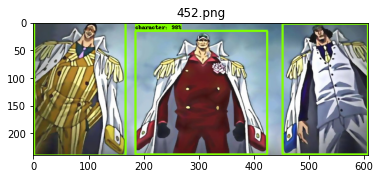

In [17]:
predictions = []

for file in test_filenames:
    #Read the image and create the input tensor
    image = Image.open(file)
    image_np = np.array(image)
    filename = os.path.basename(file)
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = np.expand_dims(image_np, 0)

    #Make an inference
    detections = model(input_tensor)
    
    #Get the results 
    num_detections = int(detections.pop("num_detections"))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    image_np_with_detections = image_np.copy()
    
    print("--------------------------------------------")
    print(f"File: {filename} \n")
    
    #Visualize the results
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.2,
          agnostic_mode=False)

    plt.figure()
    plt.title(f"{filename}")
    plt.imshow(image_np_with_detections)
    
    print('Done')
    plt.show()